In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from google.colab import files

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [5]:
# Wczytanie danych z pliku PersonalData.csv
files.upload()
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

# Wyodrębnienie rekordów A i B (tylko kolumny numeryczne)
A = df.drop(columns='Ubezp.').loc['A'].values
B = df.drop(columns='Ubezp.').loc['B'].values

# Obliczenie odległości euklidesowej d(A, B)
dist_eukl_1 = np.linalg.norm(A - B)
print(f"Odległość euklidesowa (oryginalna): {dist_eukl_1}")

# Modyfikacja skali atrybutu zarobki (z tysięcy na złote)
df_scaled = df.copy()
df_scaled['Zarobki (tys.)'] = df_scaled['Zarobki (tys.)'] * 1000
A_scaled = df_scaled.drop(columns='Ubezp.').loc['A'].values
B_scaled = df_scaled.drop(columns='Ubezp.').loc['B'].values

# Ponowne obliczenie odległości euklidesowej
dist_eukl_2 = np.linalg.norm(A_scaled - B_scaled)
print(f"Odległość euklidesowa (po zmianie skali zarobków): {dist_eukl_2}")
# Wniosek: Zmiana skali powoduje, że atrybut o większych wartościach dominuje wynik odległości.

# Eliminacja wpływu skali poprzez podział przez odchylenie standardowe
df_num = df.drop(columns='Ubezp.')
df_norm = df_num / df_num.std()
A_norm = df_norm.loc['A'].values
B_norm = df_norm.loc['B'].values

# Ponowne obliczenie odległości euklidesowej dla przeskalowanych danych
dist_eukl_3 = np.linalg.norm(A_norm - B_norm)
print(f"Odległość euklidesowa (znormalizowana przez std): {dist_eukl_3}")

# Obliczenie odległości Minkowskiego (przyjmując p=3) oraz miejskiej (Manhattan)
p = 3
dist_minkowski = np.sum(np.abs(A - B)**p)**(1/p)
dist_manhattan = np.sum(np.abs(A - B))

print(f"Odległość Minkowskiego (p=3): {dist_minkowski}")
print(f"Odległość miejska (Manhattan): {dist_manhattan}")

Saving PersonalData.csv to PersonalData.csv
Odległość euklidesowa (oryginalna): 30.604574821421714
Odległość euklidesowa (po zmianie skali zarobków): 800.5847862656397
Odległość euklidesowa (znormalizowana przez std): 4.0
Odległość Minkowskiego (p=3): 24.524624416199366
Odległość miejska (Manhattan): 68.8


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [6]:
# Implementacja najdłuższej wspólnej podsekwencji (LCS)
def lcs_len(x, y):
    m, n = len(x), len(y)
    L = np.zeros((m + 1, n + 1))
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i, j] = 0
            elif x[i-1] == y[j-1]:
                L[i, j] = L[i-1, j-1] + 1
            else:
                L[i, j] = max(L[i-1, j], L[i, j-1])
    return L[m, n]

# Obliczanie podobieństwa na podstawie metryki
def get_D_x_y(x, y):
    return len(x) + len(y) - 2 * lcs_len(x, y)

x, y = "abcde", "bcdxye"
print(f"D('{x}', '{y}') = {get_D_x_y(x, y)}") # Oczekiwany wynik 3

X, Y = "AGGTAB", "GXTXAYB"
print(f"D('{X}', '{Y}') = {get_D_x_y(X, Y)}") # Oczekiwany wynik 5

D('abcde', 'bcdxye') = 3.0
D('AGGTAB', 'GXTXAYB') = 5.0


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [7]:
# Dane wejściowe
filmy = [
    "kosmiczna stacja astronauta planeta obca",
    "astronauta rakieta księżyc misja kosmiczna",
    "wampir zamek noc krew mroczny"
]

# a. Stworzenie reprezentacji wektorowej
all_words = sorted(list(set(" ".join(filmy).split())))
def vectorize(text, vocabulary):
    words = text.split()
    return np.array([words.count(word) for word in vocabulary])

vectors = np.array([vectorize(f, all_words) for f in filmy])

# b. Obliczenie podobieństwa cosinusowego
def manual_cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

sim12 = manual_cosine_similarity(vectors[0], vectors[1])
sim13 = manual_cosine_similarity(vectors[0], vectors[2])
sim23 = manual_cosine_similarity(vectors[1], vectors[2])

print(f"Podobieństwo 1-2: {sim12:.4f}")
print(f"Podobieństwo 1-3: {sim13:.4f}")
print(f"Podobieństwo 2-3: {sim23:.4f}")

# d. Dodanie czwartego filmu i sprawdzenie podobieństwa
film4 = "rakieta mars astronauta czerwona planeta"
all_words_ext = sorted(list(set(" ".join(filmy + [film4]).split())))
v4 = vectorize(film4, all_words_ext)
vectors_ext = np.array([vectorize(f, all_words_ext) for f in filmy])

sims_with_4 = [manual_cosine_similarity(v, v4) for v in vectors_ext]
for i, s in enumerate(sims_with_4):
    print(f"Podobieństwo filmu 4 do filmu {i+1}: {s:.4f}")


print('c. Które dwa filmy są najbardziej podobne? Które najmniej?\n Najbardziej: 1 i 2. Najmniej: pary z filmem 3 (0.0).')


Podobieństwo 1-2: 0.4000
Podobieństwo 1-3: 0.0000
Podobieństwo 2-3: 0.0000
Podobieństwo filmu 4 do filmu 1: 0.4000
Podobieństwo filmu 4 do filmu 2: 0.4000
Podobieństwo filmu 4 do filmu 3: 0.0000
c. Które dwa filmy są najbardziej podobne? Które najmniej?
 Najbardziej: 1 i 2. Najmniej: pary z filmem 3 (0.0).


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

In [8]:
# A. Wczytanie danych z pliku k_means_data.csv
files.upload()
data = pd.read_csv("k_means_data.csv")

# B. Algorytm hierarchiczny aglomeracyjny
agg_model = AgglomerativeClustering(n_clusters=3) # Przyjęto 3 klastry
agg_clusters = agg_model.fit_predict(data)
print("Klastry (Aglomeracyjny):", agg_clusters)

# C. Algorytm k-średnich
kmeans_model = KMeans(n_clusters=3, n_init='auto')
kmeans_clusters = kmeans_model.fit_predict(data)
print("Klastry (K-średnich):", kmeans_clusters)

Saving k_means_data.csv to k_means_data.csv
Klastry (Aglomeracyjny): [1 1 0 1 1 2 1 2 2 1 2 2 1 2 1 2 1 1 2 1 2 0 0 1 0 0 2 1 0 0 1 0 0 0 1 1 1
 0 2 1 0 0 2 1 2 0 1 0 1 0 0 2 2 0 2 1 2 0 0 0 1 0 0 1 2 0 1 2 2 2 0 2 0 1
 2 0 1 2 2 0]
Klastry (K-średnich): [0 0 2 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 2 2 0 2 2 1 0 2 2 0 2 2 2 0 0 0
 2 1 0 2 2 1 0 1 2 0 2 0 2 2 1 1 2 1 0 1 2 2 2 0 2 2 0 1 2 0 1 1 1 2 1 2 0
 1 2 0 1 1 2]


## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

In [9]:
def my_kmeans(X, k, iterations=100):
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X.iloc[idx].values

    for _ in range(iterations):
        distances = np.array([np.linalg.norm(X.values - c, axis=1) for c in centroids])
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X.values[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels

# Zastosowanie dla danych k_means_data.csv
data_km = pd.read_csv("k_means_data.csv")
labels_custom = my_kmeans(data_km, 3)
print("Klastry (Własny K-means):", labels_custom)

Klastry (Własny K-means): [0 0 1 0 0 2 0 2 2 0 2 2 0 2 0 2 0 0 2 0 2 1 1 0 1 1 2 0 1 1 0 1 1 1 0 0 0
 1 2 0 1 1 2 0 2 1 0 1 0 1 1 2 2 1 2 0 2 1 1 1 0 1 1 0 2 1 0 2 2 2 1 2 1 0
 2 1 0 2 2 1]


## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

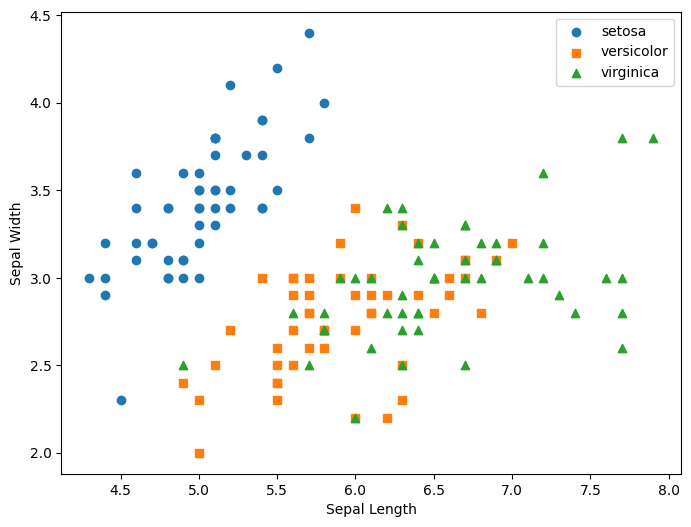

Minima:
 sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

Maksima:
 sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Wariancja (odchylenie kwadratowe):
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

Korelacja:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           

In [10]:
# 1. Załadowanie zbioru iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# 2. Wykres rozrzutu sepal_length i sepal_width
plt.figure(figsize=(8, 6))
for i, marker in enumerate(['o', 's', '^']):
    subset = df_iris[iris.target == i]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                label=iris.target_names[i], marker=marker)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# 3. Minimalne, maksymalne oraz średnie odchylenie kwadratowe
print("Minima:\n", df_iris.min())
print("\nMaksima:\n", df_iris.max())
print("\nWariancja (odchylenie kwadratowe):\n", df_iris.var())

# 4. Współczynniki korelacji
print("\nKorelacja:\n", df_iris.corr())

# 5. K-średnich dla sepal_length i sepal_width
X_iris = df_iris[['sepal length (cm)', 'sepal width (cm)']]
kmeans_iris = KMeans(n_clusters=3, n_init='auto').fit_predict(X_iris)

# 6. Hierarchiczny aglomeracyjny dla sepal_length i sepal_width
agg_iris = AgglomerativeClustering(n_clusters=3).fit_predict(X_iris)

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

Saving penguins.csv to penguins.csv
Info o zbiorze:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Braki danych przed usunięciem:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


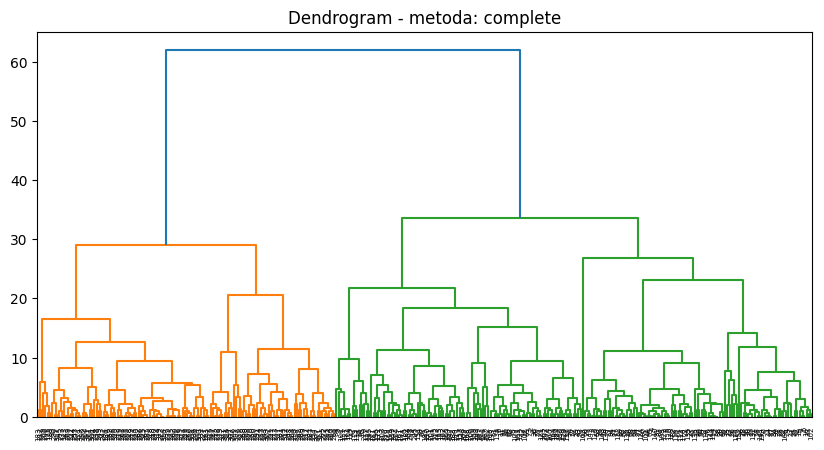

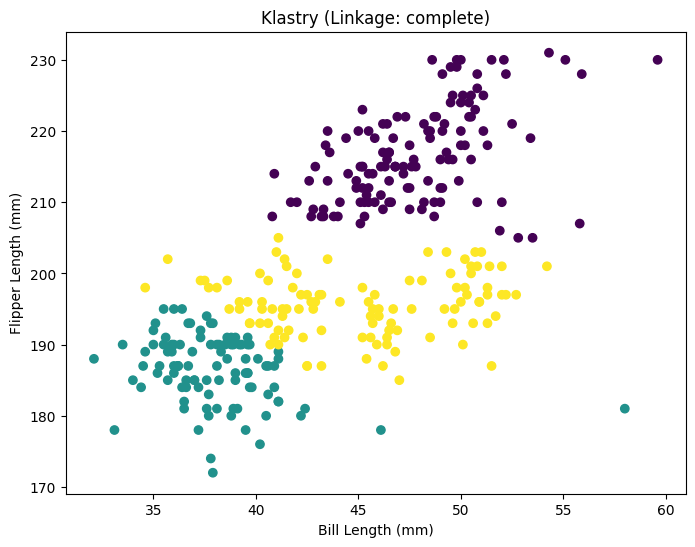

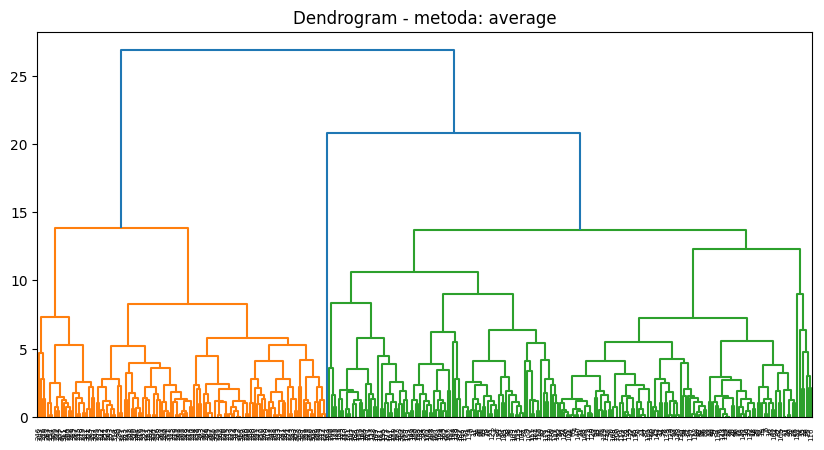

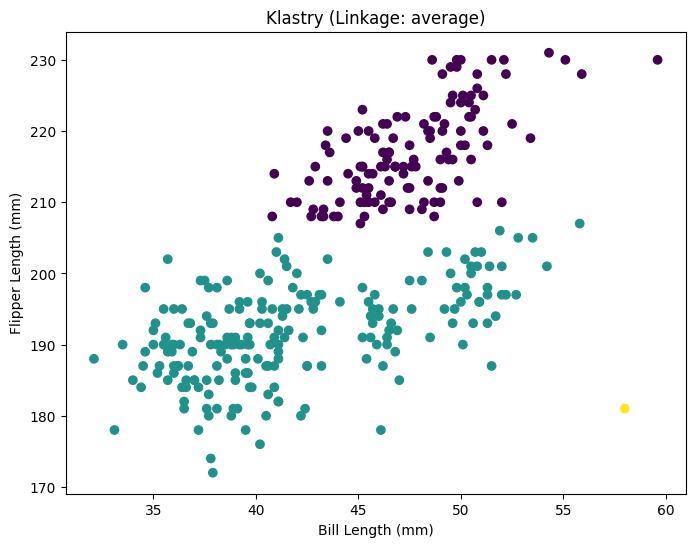

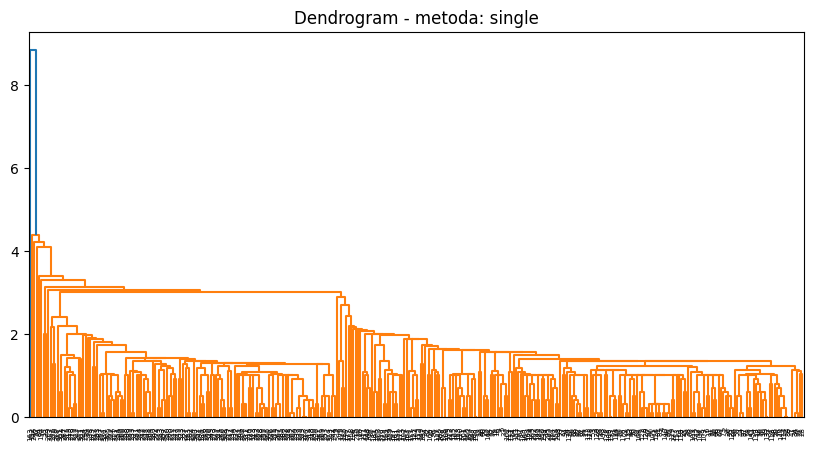

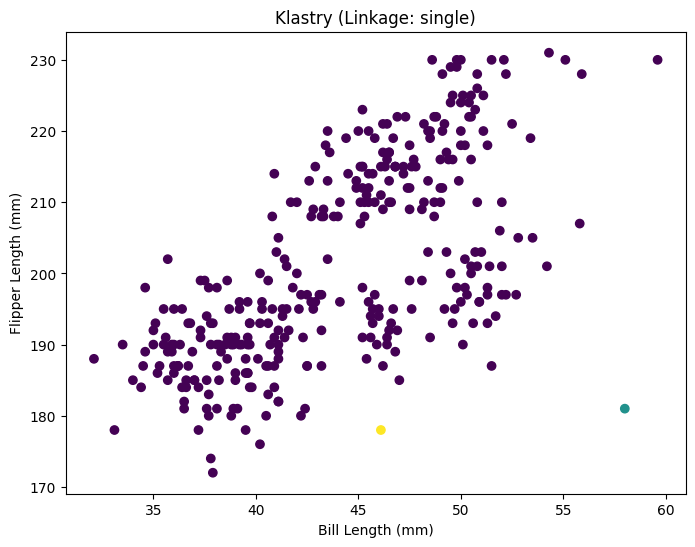

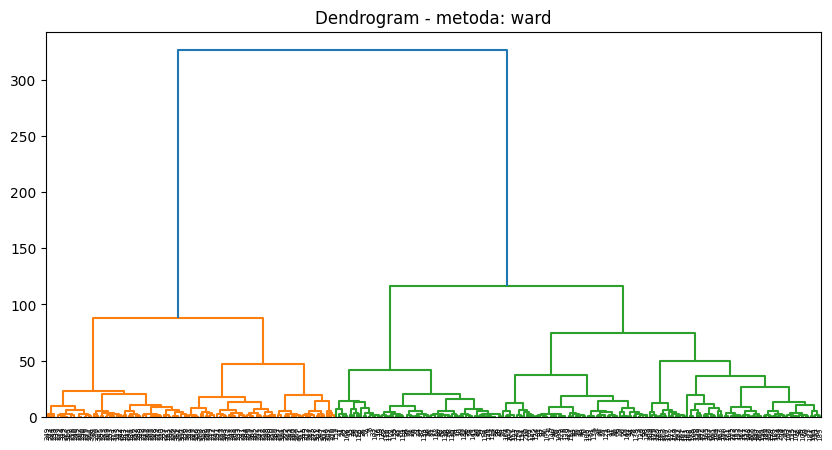

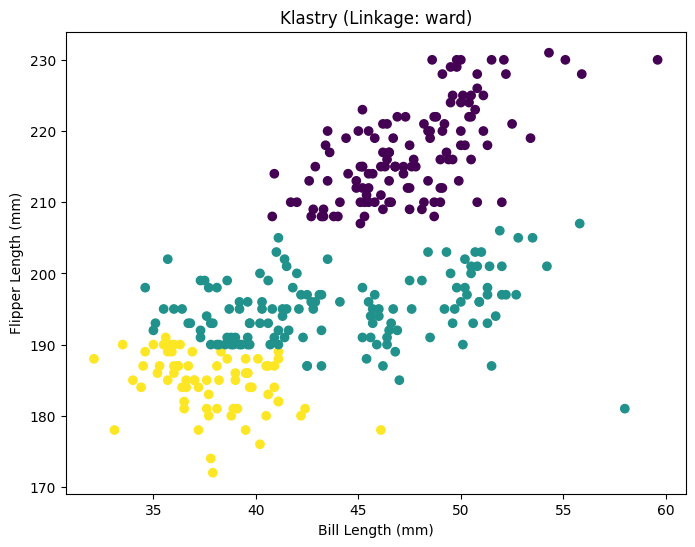

In [11]:
files.upload()
penguins = pd.read_csv("penguins.csv")
print("Info o zbiorze:")
print(penguins.info())

# 1. Sprawdzenie braków i usunięcie ich
print("\nBraki danych przed usunięciem:\n", penguins.isnull().sum())
penguins = penguins.dropna()

# 2. Ograniczenie do atrybutów bill_length_mm i flipper_length_mm
X_peng = penguins[['bill_length_mm', 'flipper_length_mm']]

# Metody linkage do przetestowania
methods = ['complete', 'average', 'single', 'ward']

for method in methods:
    # 3. Dendrogram
    Z = linkage(X_peng, method=method)
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f"Dendrogram - metoda: {method}")
    plt.show()

    # 4. Algorytm hierarchiczny (przyjęto 3 klastry na podstawie interpretacji)
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = model.fit_predict(X_peng)

    # 5. Wykres rozrzutu
    plt.figure(figsize=(8, 6))
    plt.scatter(X_peng['bill_length_mm'], X_peng['flipper_length_mm'], c=clusters, cmap='viridis')
    plt.title(f"Klastry (Linkage: {method})")
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Flipper Length (mm)')
    plt.show()

In [12]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [13]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [14]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak
